In [1]:
import matplotlib.pyplot as plt, mpld3
import numpy as np
import random
import re
import sys
import pprint
import collections

import time
import more_itertools as mit
from scipy import sparse
import pickle
from scipy.stats import gaussian_kde
from mpl_toolkits.mplot3d import Axes3D


from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [31]:
def plotPairCorr(pickleSet):
    pickleSet = pickle.load( open(pickleSet, "rb" ) )
    A = (sparse.csr_matrix.todense((pickleSet)))
    # 0               | 1       | 2        | 3                              | 4
    # charge1+charge2 | VE1+VE2 | EN of CA | \Delta \chi = \sum{EN1 - EN_i} | \Prod \chi = \sum{EN1 * EN_i} 
    labels = ['charge', 'VE', 'EN', 'Delta chi', 'Pi chi']
    k = 1
    for i in range(0, 5):
        plt.figure(figsize=(30,20))
        plt.subplots_adjust(wspace=1)
        for j in range(0,5): 
            plt.subplot(5, 5, k)
            plt.hist2d(np.asarray(A)[:,j], np.asarray(A)[:,i], cmap = 'Greys')
            plt.xlabel(labels[j])
            plt.ylabel(labels[i])
    #         plt.colorbar()

            k+=1
        plt.show()
    return A

In [32]:
def calcEnt(A):
    kernel = gaussian_kde(np.transpose(np.asarray(A)), bw_method='scott') # go np.asarray(A)[:,x:y] for ent of specific cols

    sigma = kernel.covariance
    
    anaEnt = 0.5*np.log2(np.linalg.det(2*np.pi*np.exp(1)*sigma))
    empEnt = 0.5*np.log2(np.linalg.det(2*np.pi*np.exp(1)*np.diag(np.var(np.asarray(A),0)))) # see above
    
    print("Analytical Entropy: " + str(anaEnt))
    print("Empirical Entropy: " + str(empEnt))

    # entropy stronlgy sym
    # 12.704357575289224
    # 23.691205599229843

    # entropy homolep sym
    # 19.650510961546917
    # 25.818347000965456

In [33]:
def plotFit(A, a, b):
    m1 = np.asarray(A)[:,a]
    m2 = np.asarray(A)[:,b]
    # %matplotlib notebook
    xmin = m1.min()
    xmax = m1.max()
    ymin = m2.min()
    ymax = m2.max()

    X, Y = np.mgrid[xmin:xmax:50j, ymin:ymax:50j]
    positions = np.vstack([X.ravel(), Y.ravel()])
    values = np.vstack([m1, m2])
    kernel = gaussian_kde(values)
    Z = np.reshape(kernel(positions).T, X.shape)

    fig = plt.figure()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X, Y, Z, s=2)
    plt.show()
    
    fig, ax = plt.subplots()
    fig.set_figheight(10)
    fig.set_figwidth(10)
    ax.imshow(np.rot90(Z), cmap=plt.cm.gist_earth_r, extent=[xmin, xmax, ymin, ymax], aspect='auto')
    ax.plot(m1, m2, 'k.', markersize=1)
    ax.set_xlim([xmin, xmax])
    ax.set_ylim([ymin, ymax])
    plt.show()

    return X, Y, Z

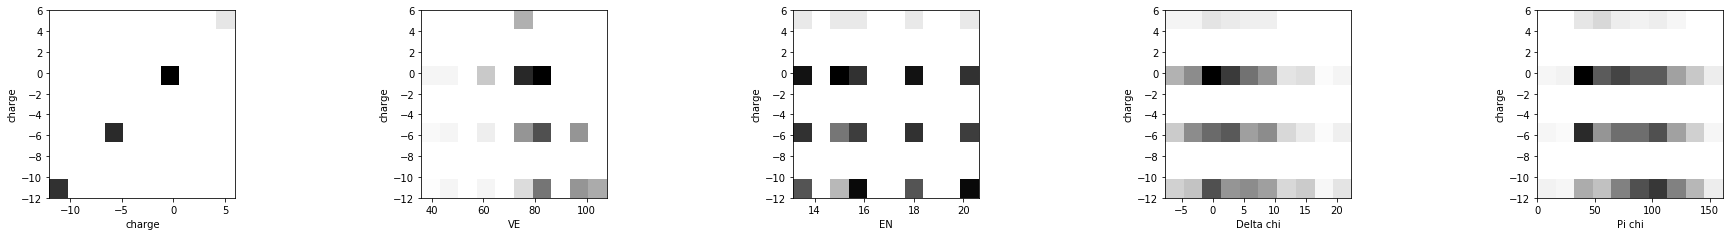

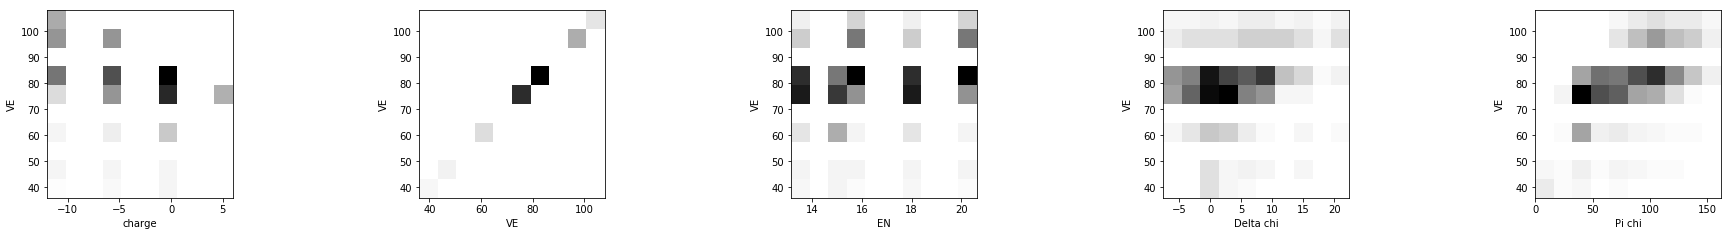

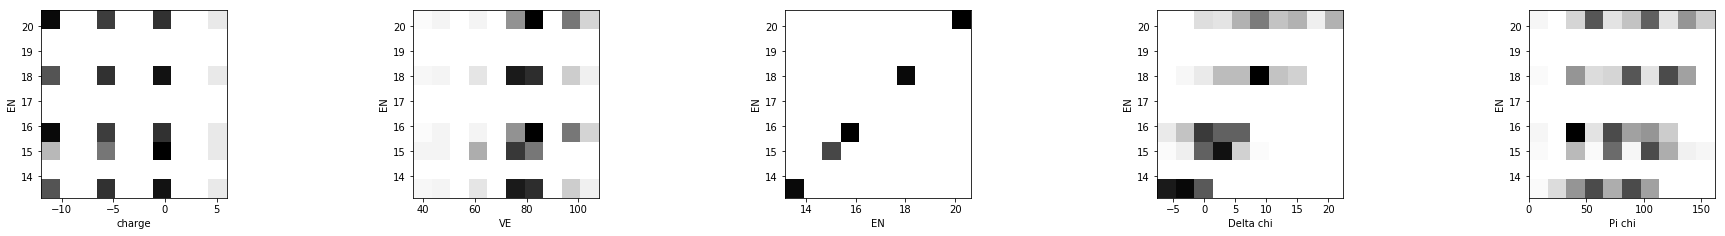

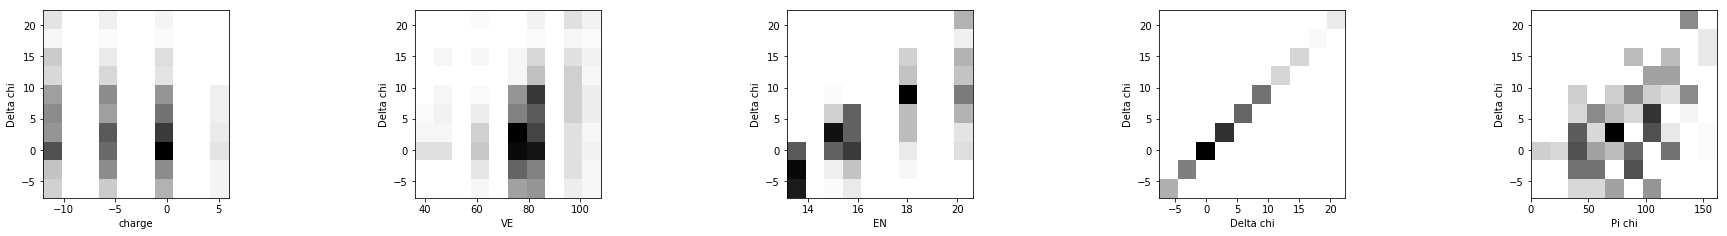

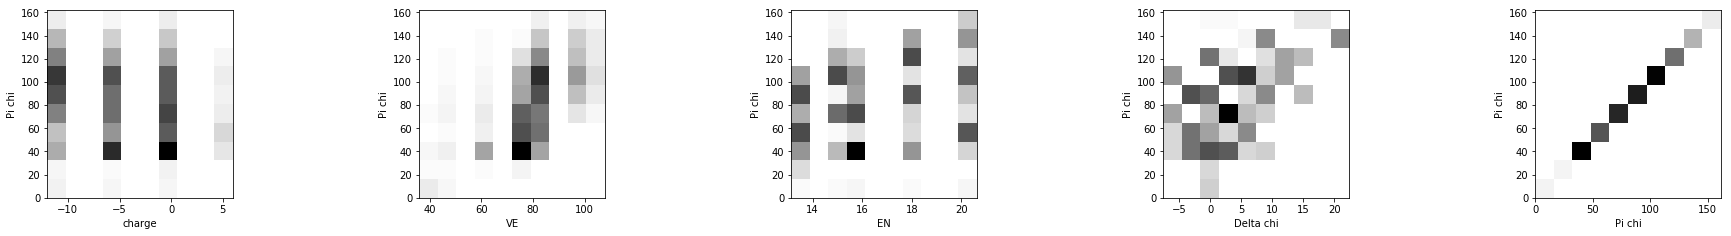

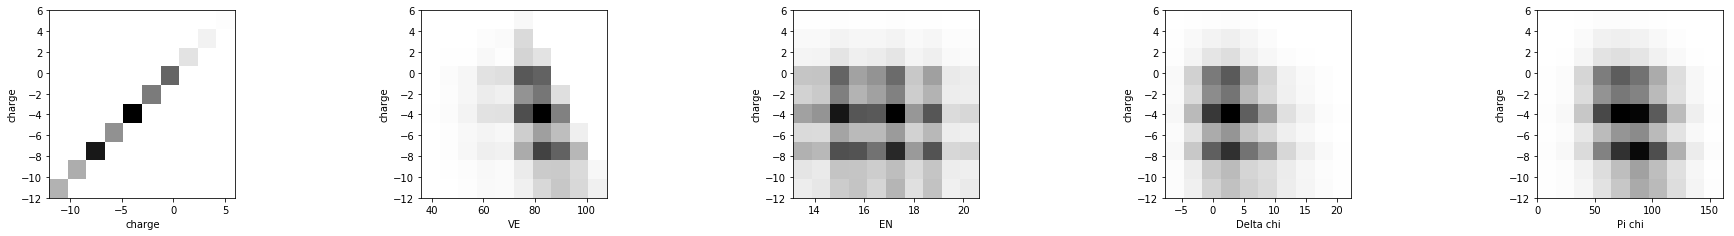

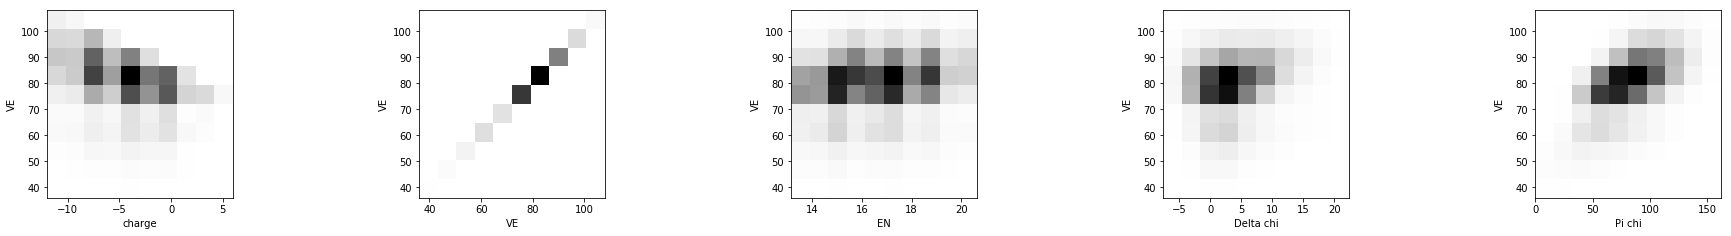

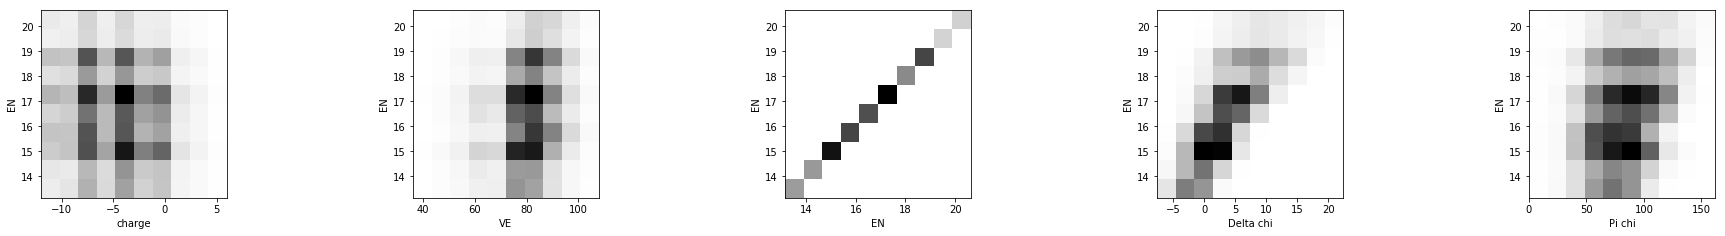

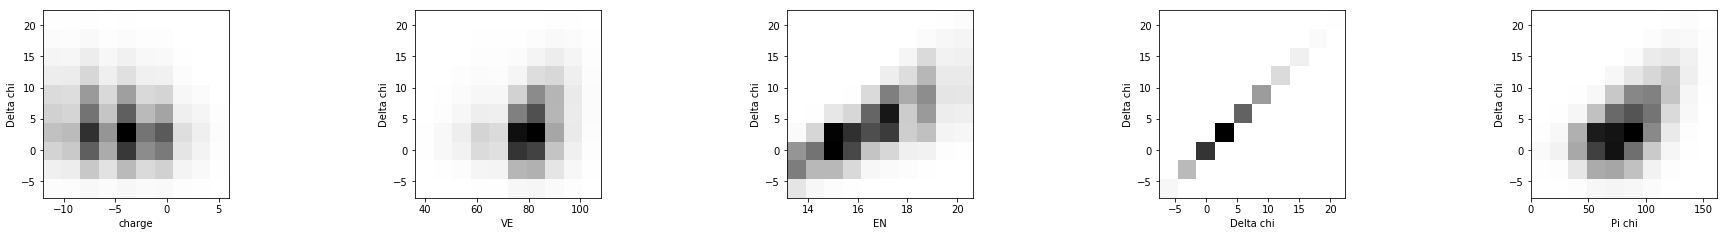

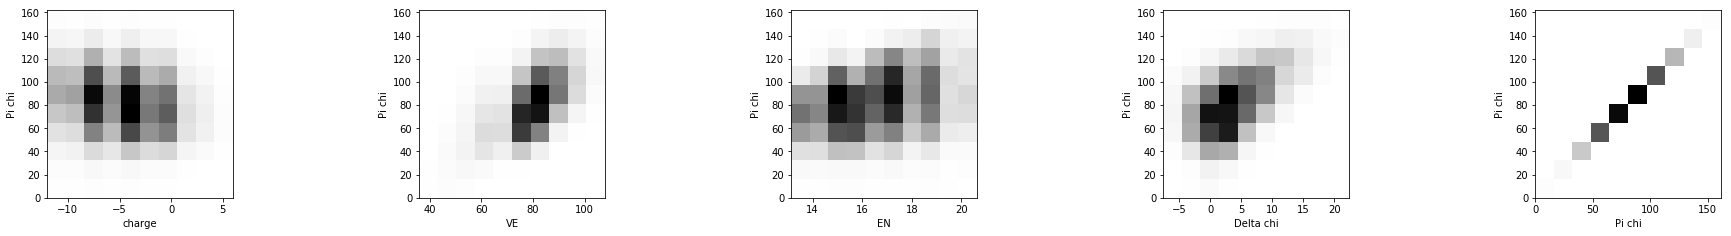

Analytical Entropy: 19.650510961546917
Empirical Entropy: 25.818347000965456
Analytical Entropy: 12.704357575289224
Empirical Entropy: 23.691205599229843


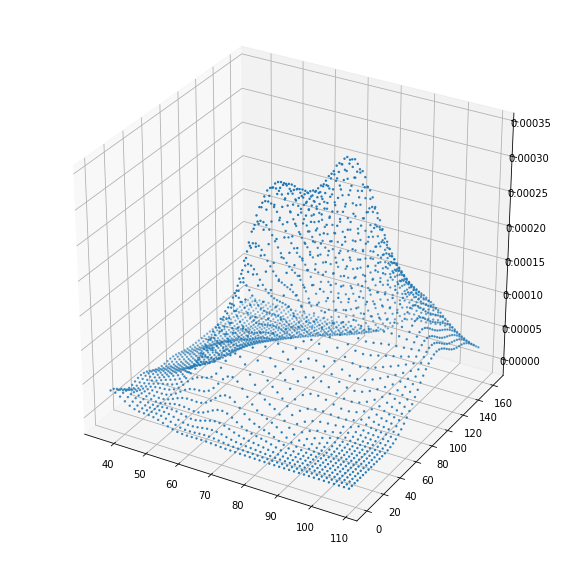

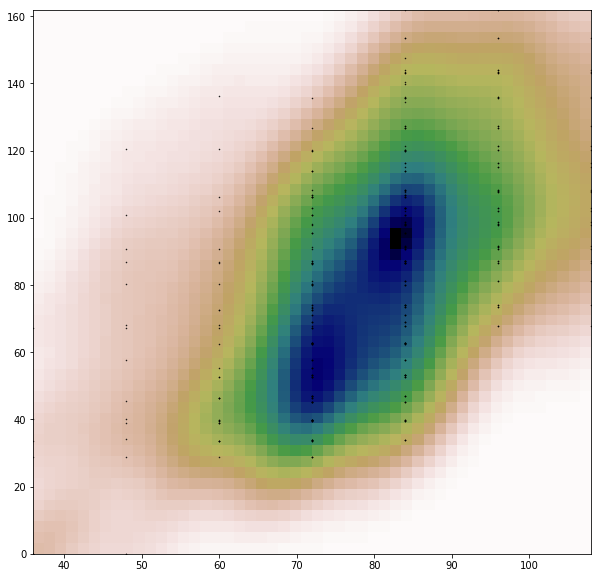

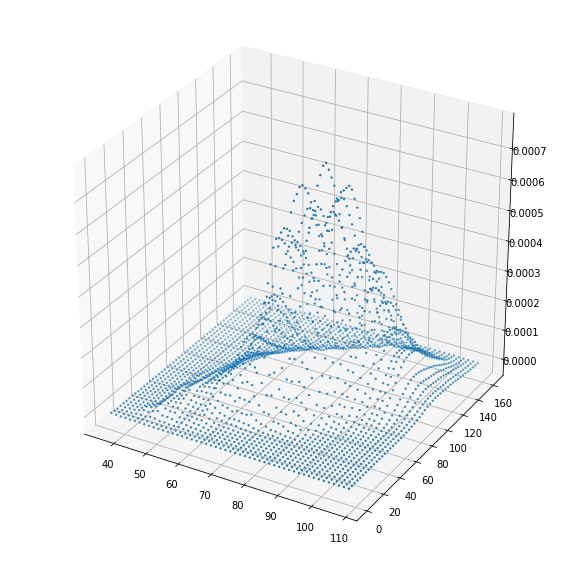

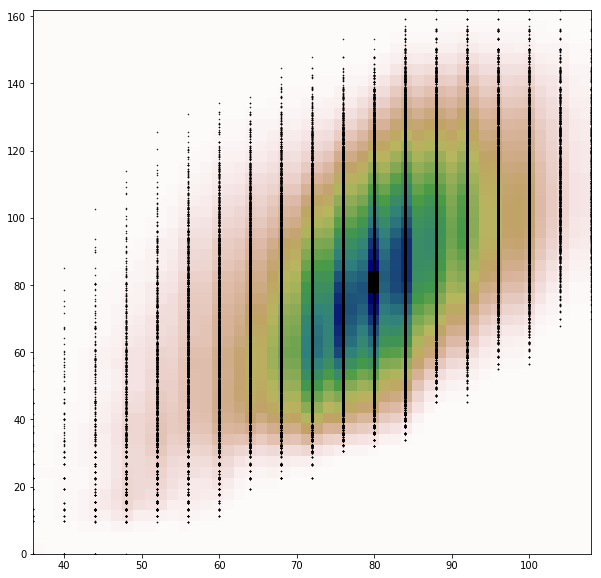

In [39]:
Ah = plotPairCorr("homolepMonodentates.p")
As = plotPairCorr("strongsymMonodentates.p")

calcEnt(Ah)
calcEnt(As)
Xh, Yh, Zh = plotFit(Ah, 1, 4)
Xs, Ys, Zs = plotFit(As, 1, 4)


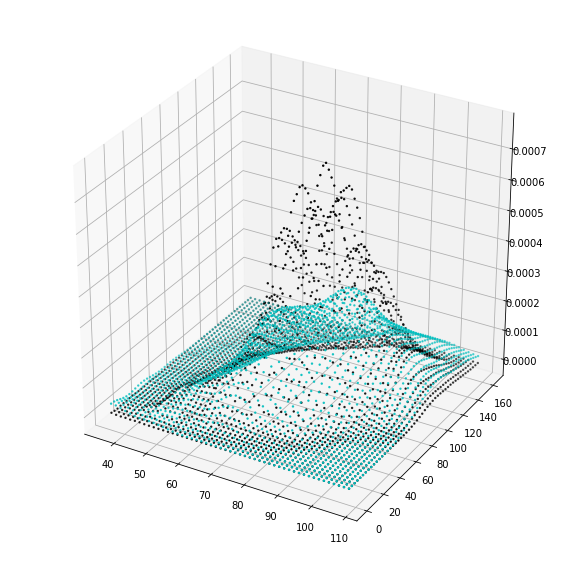

In [38]:
fig = plt.figure()
fig.set_figheight(10)
fig.set_figwidth(10)
ax = fig.add_subplot(111, projection='3d')
ax.scatter(Xs, Ys, Zs, s=2, color = 'k')
ax.scatter(Xs, Ys, Zh, s=2, color = 'c')
plt.show()